<a href="https://colab.research.google.com/github/helmitareq/Heart_attack_classification_using_SVM/blob/main/SVM_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# **Import Data**

In [ ]:
df = pd.read_csv('Medicaldataset.csv')
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [ ]:
df['Result'] = df['Result'].replace({'positive': 1, 'negative': 0})
df.head()

<ipython-input-4-9b5f9934da32>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Result'] = df['Result'].replace({'positive': 1, 'negative': 0})


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


# **Understanding Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


# **Cleaning Data**

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [ ]:
df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

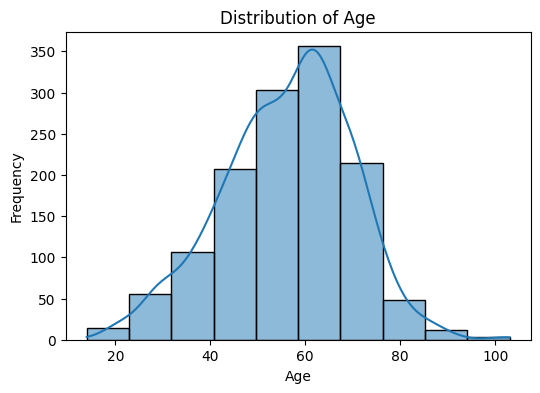

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

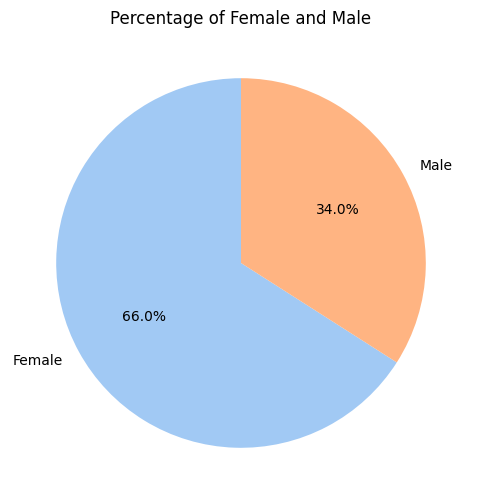

In [ ]:
sns.set_palette('pastel')
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Female and Male')
plt.show()

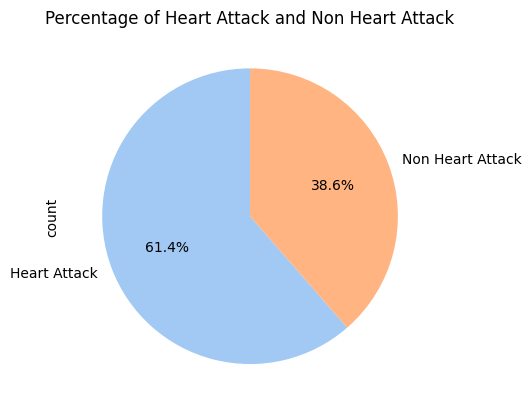

In [ ]:
sns.set_palette('pastel')
df['Result'].value_counts().plot(kind='pie', labels=['Heart Attack', 'Non Heart Attack'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Heart Attack and Non Heart Attack')
plt.show()

In [ ]:
df.corr()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.093560,-0.023655,0.018231,0.002812,-0.004007,0.017700,0.088557,0.238002
Gender,-0.093560,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023655,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.018231,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002812,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
Blood sugar,-0.004007,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.017700,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088557,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Result,0.238002,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


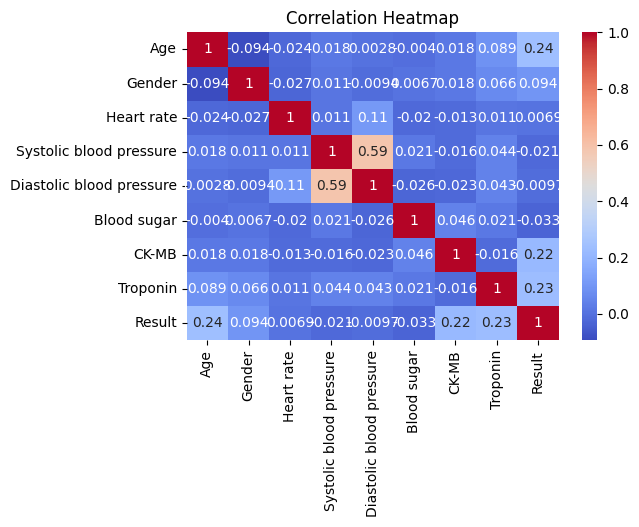

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Preparation Data**

In [ ]:
x = df.drop(columns=['Result','Gender'])
y = df['Result']

print(x.shape)
print(y.shape)

(1319, 7)
(1319,)


In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 4.99278990e-01, -2.39032215e-01,  1.25721470e+00, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.65483178e+00,  3.03491001e-01, -1.11709835e+00, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-1.41809025e-02, -2.77783874e-01,  1.25721470e+00, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.21046447e-01,  1.29108539e-01,  1.56357767e+00, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60883729e-01, -3.94038849e-01, -3.89486287e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80937968e-01,  3.03491001e-01,  1.14232858e+00, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

# **Modeling & Evaluation**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model_acc = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))
print('accuracy SVM : {:.2f}%'.format(model_acc*100))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       101
           1       0.87      0.83      0.85       163

    accuracy                           0.81       264
   macro avg       0.80      0.81      0.81       264
weighted avg       0.82      0.81      0.82       264

accuracy SVM : 81.44%


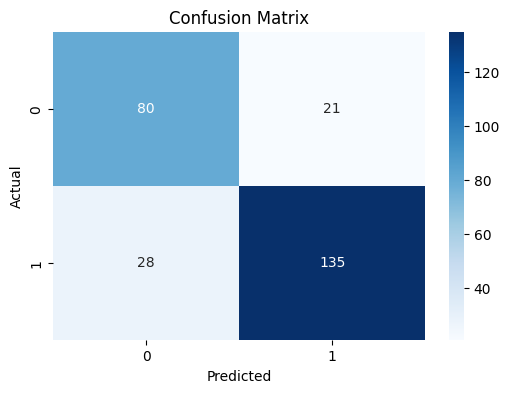

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()